In [1]:
from prophet import Prophet
import pandas as pd

In [2]:
gold_data=pd.read_csv('gold_price_data_2008_2024.csv')
gold_data.head(10)

,Date,Gold Price
0,31-08-2008,1190
1,30-08-2008,1188
2,29-08-2008,1186
3,30-09-2008,1350
4,29-09-2008,1317
5,27-09-2008,1315
6,26-09-2008,1301
7,25-09-2008,1312
8,24-09-2008,1299
9,23-09-2008,1310


In [3]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'], format='%d-%m-%Y')

In [4]:
gold_data['Year'] = gold_data['Date'].dt.year
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Day'] = gold_data['Date'].dt.day

In [5]:
gold_data.rename(columns={'Gold Price' : 'Gold_Price'}, inplace=True)

In [6]:
gold_data.dtypes

Date          datetime64[ns]
Gold_Price             int64
Year                   int32
Month                  int32
Day                    int32
dtype: object

In [7]:
gold_data

,Date,Gold_Price,Year,Month,Day
0,2008-08-31,1190,2008,8,31
1,2008-08-30,1188,2008,8,30
2,2008-08-29,1186,2008,8,29
3,2008-09-30,1350,2008,9,30
4,2008-09-29,1317,2008,9,29
...,...,...,...,...,...
5662,2024-05-03,7039,2024,5,3
5663,2024-05-02,7069,2024,5,2
5664,2024-05-01,7047,2024,5,1
5665,2024-06-02,7205,2024,6,2


In [8]:
df = gold_data[['Date', 'Gold_Price']].rename(columns={'Date': 'ds', 'Gold_Price':'y'})

In [9]:
model = Prophet()

In [10]:
model.fit(df)

13:04:27 - cmdstanpy - INFO - Chain [1] start processing
13:04:31 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = model.make_future_dataframe(periods=365)

In [12]:
forecast = model.predict(future)

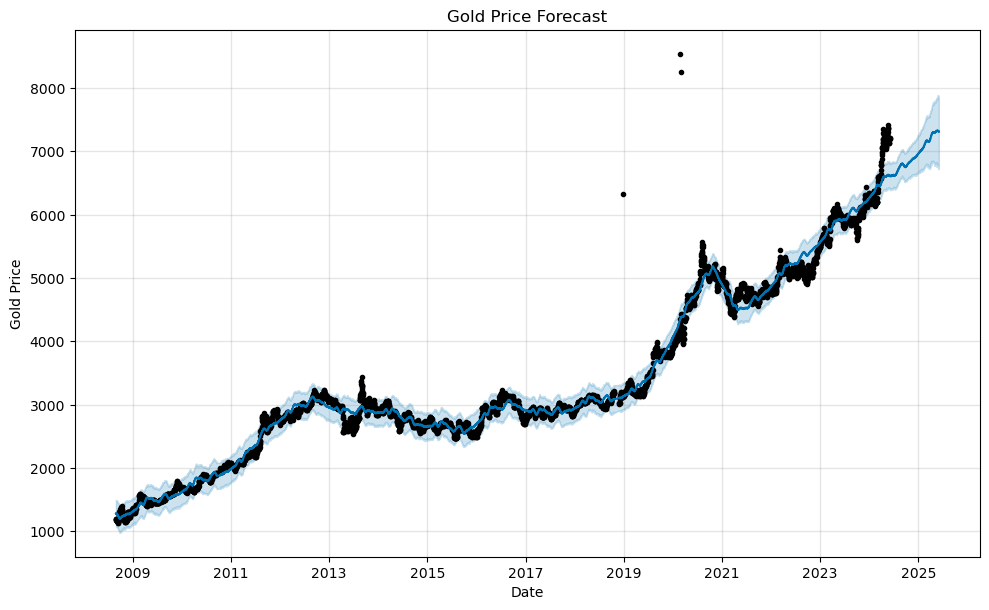

In [13]:
import matplotlib.pyplot as plt

fig = model.plot(forecast)
plt.title("Gold Price Forecast")
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.show()

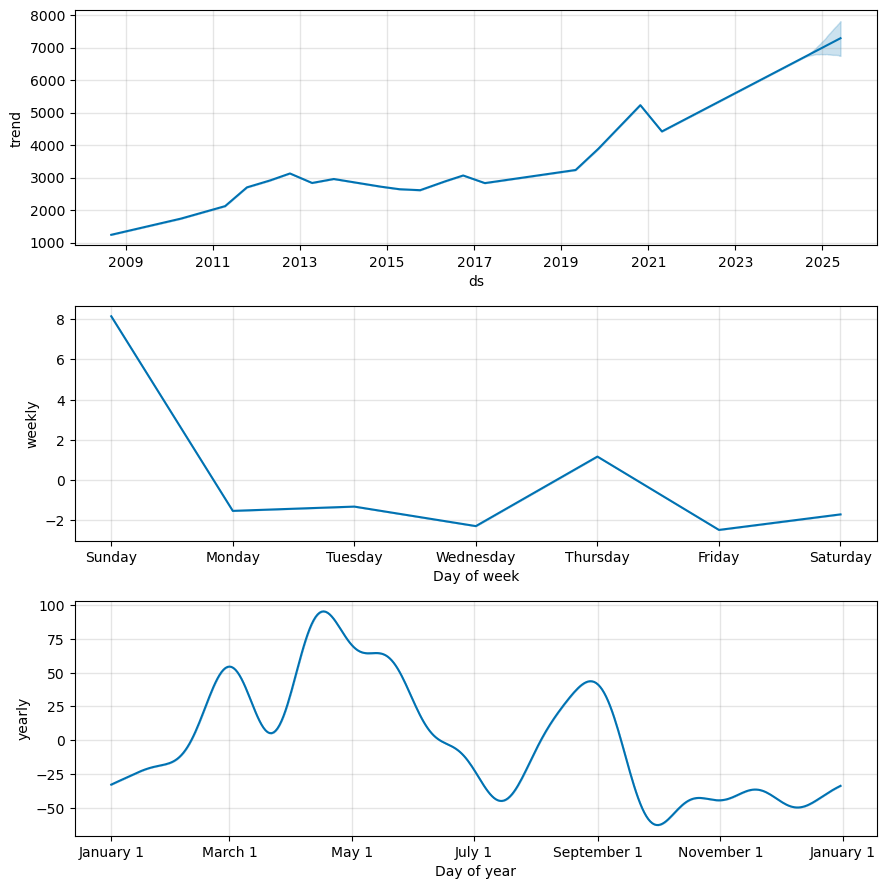

In [14]:
fig2 = model.plot_components(forecast)
plt.show()
     

In [15]:
specific_date = '2024-05-30'
future_specific_date = pd.DataFrame({'ds': [specific_date]})

forecast_specific_date = model.predict(future_specific_date)

# Print the forecast
print(forecast_specific_date[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

          ds         yhat   yhat_lower   yhat_upper
0 2024-05-30  6619.598484  6418.609177  6829.272735


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

forecast = forecast[['ds', 'yhat']].merge(df[['ds', 'y']], on='ds')

# Calculate error metrics
y_true = forecast['y']
y_pred = forecast['yhat']

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mape = (abs((y_true - y_pred) / y_true).mean()) * 100

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

MAE: 98.71715473775036
MSE: 25910.609899512616
RMSE: 160.96772937304115
MAPE: 2.9688136948740467%


In [17]:
from sklearn.metrics import r2_score

# Calculate R^2 score
r2 = r2_score(y_true, y_pred)
print(f'R^2: {r2}')


R^2: 0.9857877898634412


In [18]:
threshold = 10

accuracy_within_threshold = ((abs(y_true - y_pred) <= threshold).sum() / len(y_true)) * 100
print(f'Accuracy within {threshold} units: {accuracy_within_threshold}%')

Accuracy within 10 units: 7.711311099347097%


# THE END